<h1>Chapter 12: The 2D Ising Model<h1>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import sympy as sy

<h2>12.1 Description of the Model<h2>

<h2>12.2 Computational Implementation<h2>

<h3>12.2.1 Representing spin configurations as lists<h3>

In [ ]:
example = np.array([[1,2],[3,4]])

In [ ]:
print(example)

[[1 2]
 [3 4]]


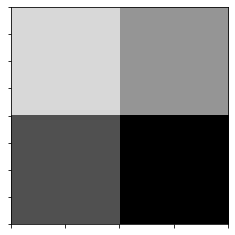

In [ ]:
def arrayPlot(array,vmin=0,vmax=None):
    #plt.style.use('_mpl-gallery-nogrid')
    fig, ax = plt.subplots()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(array,cmap='Greys',vmin=vmin,vmax=vmax)
    plt.show()
arrayPlot(example)

In [ ]:
example[0]

array([1, 2])

In [ ]:
example[0,0]

1

In [ ]:
example[0,1]

2

In [ ]:
row, col = np.random.randint(0,2,2)

In [ ]:
example[row,col]

3

<h3>12.2.2 Generating initial configurations<h3>

In [ ]:
nSize = 6
allUpConfig = np.array([[1]*nSize]*nSize)
print(allUpConfig)

[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]


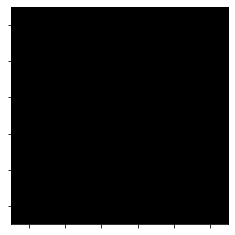

In [ ]:
arrayPlot(allUpConfig,-1,1)

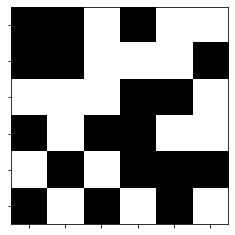

In [ ]:
randomConfig = np.array([[(-1)**np.random.randint(2) for i in range(nSize)] for j in range(nSize)])
arrayPlot(randomConfig,-1,1)

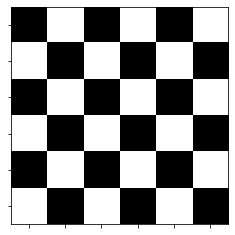

In [ ]:
checkerboardConfig = np.array([[(-1)**(row+col) for row in range(nSize)] for col in range(nSize)])
arrayPlot(checkerboardConfig,-1,1)

<h3>12.2.3 Computing properties: Magnetization<h3>

In [ ]:
def netMagnetization(config):
    total = 0
    for row in config:
        for element in row:
            total+= element
    return total

In [ ]:
netMagnetization(allUpConfig)

36

In [ ]:
netMagnetization(checkerboardConfig)

0

In [ ]:
def netMagnetization(config):
    return np.sum(config)

In [ ]:
(netMagnetization(allUpConfig),netMagnetization(checkerboardConfig))

(36, 0)

In [ ]:
def netMagnetizationPerSpin(config):
    return netMagnetization(config)/len(config)**2

In [ ]:
(netMagnetizationPerSpin(allUpConfig),netMagnetizationPerSpin(checkerboardConfig))

(1.0, 0.0)

In [ ]:
netMagnetizationPerSpin(randomConfig)

0.0

<h3>12.2.4 Computing properties: Energy<h3>

In [ ]:
def energyIsing2D(config,J,B):
    energyB,energyJ = 0,0 # Initializes local variables
    for row in range(len(config)): # Loop over rows
        for col in range(len(config)): # Simultaneously loop over columns
            energyB += B*config[row,col]
            if row>0: # Up
                energyJ += J*config[row-1,col]*config[row,col]
            if row<len(config)-1: # Down
                energyJ += J*config[row+1,col]*config[row,col]
            if col>0: # Left
                energyJ += J*config[row,col-1]*config[row,col]
            if col<len(config)-1: # Right
                energyJ += J*config[row,col+1]*config[row,col]
    return energyB + energyJ/2 # Removes double counting       

In [ ]:
energyIsing2D(checkerboardConfig,1,0)

-60.0

In [ ]:
energyIsing2D(checkerboardConfig,-1,0)

60.0

In [ ]:
energyIsing2D(allUpConfig,0,1)

36.0

In [ ]:
def energyPerSpin(config,J,B,energyFunction):
    return energyFunction(config,J,B)/len(config)**2

In [ ]:
(energyPerSpin(checkerboardConfig,1,0,energyIsing2D),
energyPerSpin(checkerboardConfig,-1,0,energyIsing2D),
energyPerSpin(allUpConfig,0,1,energyIsing2D))

(-1.6666666666666667, 1.6666666666666667, 1.0)

<h2>12.3 Metropolis Monte Carlo Simulation<h2>

<h3>12.3.1 Basic implementations<h3>

In [ ]:
def MCstep(kT,J,B,config):
    newConfig = config.copy()
    row,col = np.random.randint(0,len(config),2)
    Estart = config[row,col]*B
    if row>0: # Up
        Estart += J*config[row-1,col]*config[row,col]
    if row<len(config)-1: # Down
        Estart += J*config[row+1,col]*config[row,col]
    if col>0: # Left
        Estart += J*config[row,col-1]*config[row,col]
    if col<len(config)-1: # Right
        Estart += J*config[row,col+1]*config[row,col]
    
    Eend = -Estart
    
    if Eend < Estart or np.random.random() <= np.exp(-(Eend-Estart)/kT): # If energy decreased or randomly
        newConfig[row,col] *= -1 # Then flip the spin
    
    return newConfig

In [ ]:
def arrayPlot(array,ax=None,vmin=0,vmax=None):
    if ax==None:
        fig,ax = plt.subplots()
    #plt.style.use('_mpl-gallery-nogrid')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    return [ax.imshow(array,cmap='Greys',vmin=vmin,vmax=vmax, animated=True)]

In [ ]:
def runMCmovie(kT,J,B,MCstepFunction, ax):
    config = checkerboardConfig.copy()
    trajectory = []
    for i in range(1500):
        config = MCstepFunction(kT,J,B,config)
        trajectory.append(arrayPlot(config,ax,-1,1))
    return trajectory

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
%matplotlib notebook
import matplotlib.animation as animation

fig1, ax = plt.subplots()
images = runMCmovie(10,-1,0,MCstep, ax)

ani = animation.ArtistAnimation(fig1, images, interval=1000/50, blit=True)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

In [ ]:
ani

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def runMC(kT, J, B, nEquil, nDataCol, sampleInterval, config, MCstepFunction, energyFunction):
    Esamples = []
    Msamples = []
    newConfig = config.copy()
    for i in range(nEquil):
        newConfig = MCstepFunction(kT, J, B, newConfig)
    for i in range(nDataCol):
        newConfig = MCstepFunction(kT, J, B, newConfig)
        if i%sampleInterval == 0:
            Esamples.append(energyFunction(newConfig,J,B))
            Msamples.append(abs(netMagnetizationPerSpin(newConfig)))
    Esamples = np.array(Esamples)
    Msamples = np.array(Msamples)
    return [Esamples.mean()/len(config)**2, # Energy per spin
           Esamples.var()/(len(config)**2*kT**2), # Heat Capacity
           Msamples.mean(), # Net magnetization per spin
           newConfig] # The Final configuration

In [ ]:
EPerSpin,heatCap,netMagPerSpin,finalConfig = runMC(10,-1,0,10000,200000,1000,checkerboardConfig,MCstep,energyIsing2D)

In [ ]:
arrayPlot(finalConfig)

<IPython.core.display.Javascript object>

<h2>12.4 Generalization<h2>

<h3>12.4.1 Periodic boundary conditions<h3>

In [ ]:
def energyIsing2DPBC(config, J, B):
    energyB = 0
    energyJ = 0
    for row in range(len(config)):
        for col in range(len(config)):
            energyB += B*config[row,col]
            if row>0: # Up
                energyJ += J*config[row-1,col]*config[row,col] # Interior
            else:
                energyJ += J*config[len(config)-1,col]*config[row,col] # Periodic boundary conditions
            if row<len(config)-1: # Down
                energyJ += J*config[row+1,col]*config[row,col] # Interior
            else:
                energyJ += J*config[0,col]*config[row,col] # Periodic boundary conditions
            if col>0: # Left
                energyJ += J*config[row,col-1]*config[row,col] # Interior
            else:
                energyJ += J*config[row,len(config)-1]*config[row,col] # Periodic boundary conditions
            if col<len(config)-1: # right
                energyJ += J*config[row,col+1]*config[row,col] # Interior
            else:
                energyJ += J*config[row,0]*config[row,col] # Periodic boundary conditions
    return energyB+(energyJ/2) # Remove double counting and return final result

In [ ]:
(energyPerSpin(checkerboardConfig,1,0,energyIsing2DPBC),
energyPerSpin(checkerboardConfig,-1,0,energyIsing2DPBC),
energyPerSpin(allUpConfig,0,1,energyIsing2DPBC))

(-2.0, 2.0, 1.0)

In [ ]:
def MCstepPBC(kT,J,B,config):
    newConfig = config.copy()
    row,col = np.random.randint(0,len(config),2)
    Estart = config[row,col]*B
    if row>0: # Up
        Estart += J*config[row-1,col]*config[row,col] # Interior
    else:
        Estart += J*config[len(config)-1,col]*config[row,col] # Periodic boundary conditions
    if row<len(config)-1: # Down
        Estart += J*config[row+1,col]*config[row,col] # Interior
    else:
        Estart += J*config[0,col]*config[row,col] # Periodic boundary conditions
    if col>0: # Left
        Estart += J*config[row,col-1]*config[row,col] # Interior
    else:
        Estart += J*config[row,len(config)-1]*config[row,col] # Periodic boundary conditions
    if col<len(config)-1: # right
        Estart += J*config[row,col+1]*config[row,col] # Interior
    else:
        Estart += J*config[row,0]*config[row,col] # Periodic boundary conditions
    Eend = -Estart
    if Eend<Estart or np.random.random()<=np.exp(-(Eend-Estart)/kT): # Did the energy decrease or it randomly increases in energy?
        newConfig[row,col]*=-1
    return newConfig # Return the potentially altered array

In [ ]:
EPerSpin,heatCap,netMagPerSpin,finalConfig=runMC(10,-1,0,10000,200000,1000,checkerboardConfig,MCstepPBC,energyIsing2DPBC)

In [ ]:
arrayPlot(finalConfig) # Final configuration of simulation using periodic boundary conditions

<IPython.core.display.Javascript object>

In [ ]:
def MCstepConstN(kT,J,B,config):
    newConfig=config.copy()
    configDidChange=False
    rowA,colA,rowB,colB=np.random.randint(1,len(config),4)
    
    spinA = config[rowA,colA]
    spinB = config[rowB,colB]
    
    if spinA != spinB: # Only do MC procedure if something charged
        newConfig[rowA,colA] = spinB # First, interchange the spins
        newConfig[rowB,colB] = spinA
        Estart = energyIsing2D(config,J,B) # Get configuration energies
        Eend = energyIsing2D(newConfig,J,B)
        if Eend<Estart or np.random.random()<np.exp(-(Eend-Estart)/kT): # Did the energy decrease or it randomly increases in energy?           
            configDidChange = True
    if configDidChange: # Did the configuration change uring this process
        return newConfig # configDidChange==True, so return the new spin config
    return config # Otherwise, return the original spin configuration

In [ ]:
EPerSpin,heatCap,netMagPerSpin,finalConfig=runMC(10,-1,0,10000,200000,1000,checkerboardConfig,MCstepConstN,energyIsing2DPBC)

In [ ]:
arrayPlot(finalConfig) # Final configuration of constant N simulation

<IPython.core.display.Javascript object>

In [ ]:
fig2, ax = plt.subplots()
images = runMCmovie(10,-1,0,MCstepPBC, ax)

ani2 = animation.ArtistAnimation(fig2, images, interval=1000/50, blit=True)

<IPython.core.display.Javascript object>

In [ ]:
ani2 # Show the movie of the simulation with PBC 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig3, ax3 = plt.subplots()
images3 = runMCmovie(1,-1,0,MCstepConstN, ax3)
ani3 = animation.ArtistAnimation(fig3, images3, interval=1000/50, blit=True, repeat_delay=500)

<IPython.core.display.Javascript object>

In [ ]:
ani3

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig4, ax4 = plt.subplots()
images4 = runMCmovie(10,-1,0,MCstepConstN, ax4)
ani4 = animation.ArtistAnimation(fig4, images4, interval=1000/50, blit=True, repeat_delay=500)

<IPython.core.display.Javascript object>

In [ ]:
ani4

Output hidden; open in https://colab.research.google.com to view.

<h3>12.4.3 Further generalizations<h3>

<h2>12.5 Looking Forward<h2>